<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1 
# *Logistic Regression*

## Predicting Survival on the Titanic

The Titanic sank during her maiden voyage after colliding with an iceberg (April 15, 1912). Due to a commercial decision there were insufficient lifeboats, a fact that was partially responsible for the loss 1,502 out of 2,224 passengers and crew. 

The Titanic dataset incorporates many features of typical real-world problems: a mixture of continuous and discrete features, missing data, linear covariance, and an element of random chance. Predicting survival therefore involves many practical data science skills.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

### 1. Load Data

Load the `titanic.csv` file into a DataFrame named "titanic", with index column = `PassengerId`. Display the head of the DataFrame.

In [3]:
# ANSWER
data = pd.read_csv('../../data/titanic_train.csv', index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Why would we want to set an index column based on `PassengerId`?

ANSWER: This column is the key to training and testing our model. We use it to partition the dataset and to test the predictions of our model against known outcomes.

<a name="datadictionary"></a>
### 2. Data Dictionary 

If a data dictionary is available, it is handy to include it in the notebook for reference:

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### 2. EDA

Explore dataset. Find features to predict `Survived`. Get rid of null values. 

In [4]:
# ANSWER
data.shape

(891, 11)

In [5]:
data.isnull().sum()[data.isnull().sum()>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [6]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


/Users/allenj/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/allenj/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


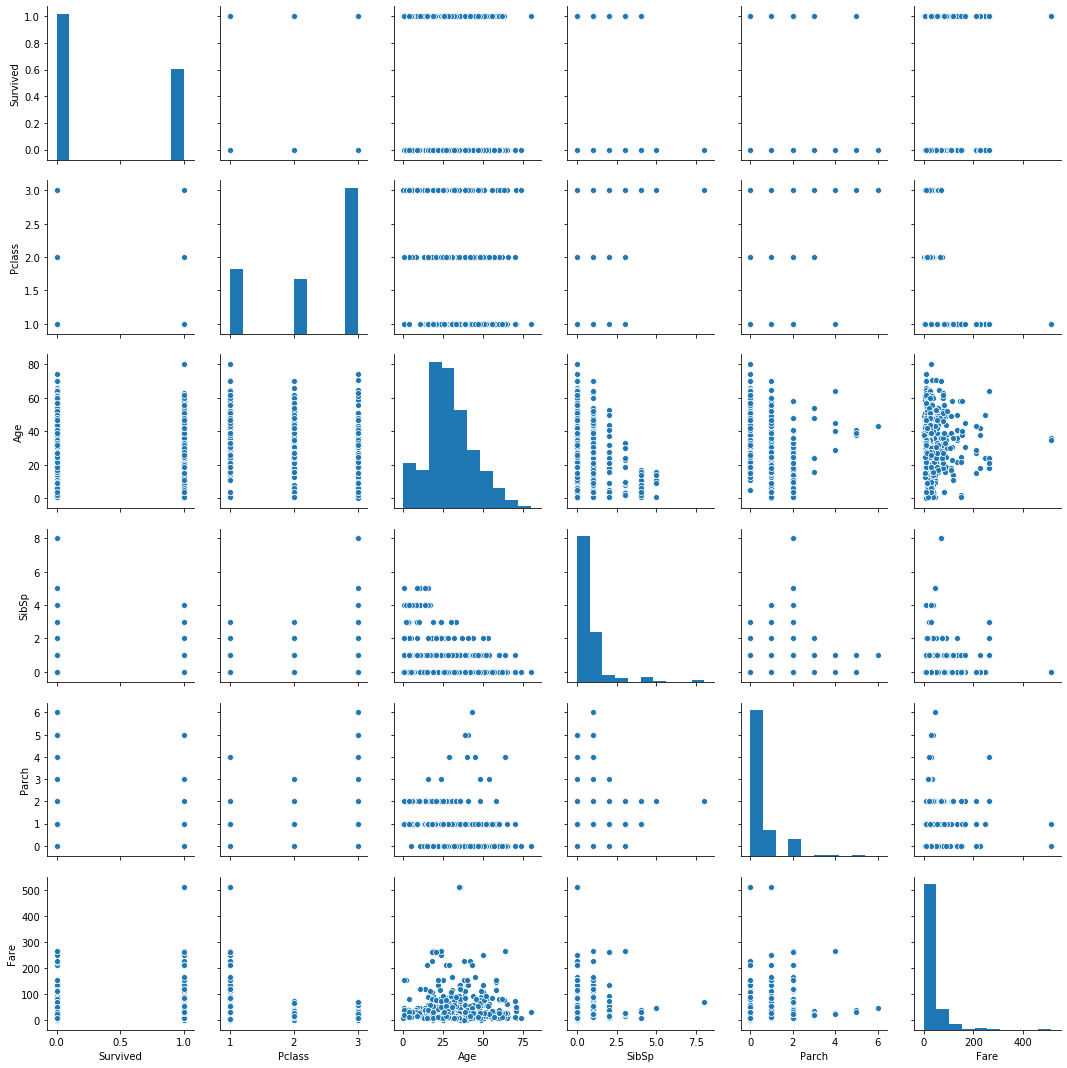

In [7]:
sns.pairplot(data)
plt.show()

### 3. Numerical Predictors Only

#### 3.1. Set Target and Features

To begin, let's try a model based on the passenger class (`Pclass`) and parents/children features (`Parch`):

In [8]:
# ANSWER
X = data[['Pclass', 'Parch']]
y = data['Survived']

#### 3.2 Partition

Partition the data into training and testing subsets:

- Use `random_state` = 1

In [9]:
# ANSWER
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =1)

#### 3.3. Build Model

Prepare a model by creating an instance of the `LogisticRegression` class from the `sklearn.linear_model` library:

In [10]:
# ANSWER
# Create Model
logreg = LogisticRegression()

Now train it on the training data subset, using the `fit` method of the model object (Nb. by default, `fit` will print the hyperparameters of the model):

In [11]:
# ANSWER
# Fit Model
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

/Users/allenj/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6901197604790419

The computed coefficients are an array (`coef_`) stored in the 1st element of an array:

In [12]:
# ANSWER
logreg.coef_

array([[-0.84439049,  0.3412417 ]])

The computed intercept (`intercept_`) is the 1st element of another array:

In [13]:
# ANSWER
logreg.intercept_

array([1.23165951])

We can create tuples of the predictor names and coefficients like this:

In [14]:
# ANSWER
feature_cols = data[['Pclass', 'Parch']]
print(set(zip(feature_cols, logreg.coef_[0])))

{('Pclass', -0.8443904940738106), ('Parch', 0.3412416997316232)}


If we want formatted output, here is a neat way to list the coefficients by predictor:

In [15]:
for col in zip(X_train.columns, logreg.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

Pclass      -0.844390
Parch       +0.341242


This result implies that survival declines with passenger class (i.e. 1st class is highest) but increases with the number of parents or children in a group.

Let's see how well the model fit the training data. The `accuracy_score` is the proportion of correct predictions:

In [16]:
# ANSWER
from sklearn.metrics import accuracy_score
pred_train = logreg.predict(X_train)
accuracy_score(y_train, pred_train)

0.6901197604790419

What is the  `accuracy_score` for the test data?

In [17]:
# ANSWER
pred_test = logreg.predict(X_test)
accuracy_score(y_test, pred_test)

0.6681614349775785

What can we say aout this result?

ANSWER
- Using passenger class and family size is a good predictor of whether someone was to survive
- It seems like the lower the passenger class the less likely that person was to survived, but that likelihood would increase if they had more family on board

#### 3.4. Add `AGE` as Feature

Let's include `Age` in the model. As we know from our EDA, this feature has many missing values. We don't want to throw away so many rows, so we will replace `NA` values with imputed values (e.g. the overall mean age):

In [51]:
data.groupby('Sex')['Age'].mean()

Sex
female    28.216730
male      30.505824
Name: Age, dtype: float64

In [18]:
# Impute with mean
data['Age'].fillna((data['Age'].mean()), inplace=True)

In [19]:
# ANSWER
print(data[data["Age"].isnull()][data.columns[data.isnull().any()]])

Empty DataFrame
Columns: [Cabin, Embarked]
Index: []


In [20]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [21]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [22]:
data.isnull().sum()[data.isnull().sum()>0]

Cabin       687
Embarked      2
dtype: int64

In [23]:
# Build Model
X2 = data[['Pclass', 'Parch', 'Age']]
y2 = data['Survived']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state =1)
# Fit Model
logreg.fit(X2_train, y2_train)
pred_test2 = logreg.predict(X2_test)

# Score
print("R^2:", logreg.score(X2_train, y2_train))
print(logreg.coef_)
print(logreg.intercept_)
print(accuracy_score(y2_test, pred_test2))

R^2: 0.7215568862275449
[[-0.98741533  0.27236461 -0.02952841]]
[2.45663711]
0.6860986547085202


/Users/allenj/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


So, including age did little to reduce the variance in our model. Why might this be?

In [24]:
data['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

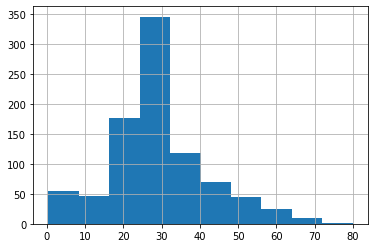

In [25]:
data['Age'].hist()

ANSWER

- Age is not a strong correlation to begin with
- Age looks somewhat evenly distributed

Let's see where the model is going wrong by showing the Confusion Matrix:

In [26]:
# ANSWER
from sklearn.metrics import confusion_matrix
y_pred_class = logreg.predict(X2_test)
print(confusion_matrix(y2_test, y_pred_class))

[[112  16]
 [ 54  41]]


Nb. Here is how `confusion_matrix` arranges its output:

In [27]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


Which type of error is more prevalent?

In [28]:
print("Precision:",(41)/(41+16))

Precision: 0.7192982456140351


ANSWER: False Negative is more prevalent. False negative in this case is falsely predicting that the passenger has not survived.

Maybe we aren't using the right cut-off value. By default, we are predicting that `Survival` = True if the probability >= 0.5, but we could use a different threshold. The ROC curve helps us decide (as well as showing us how good our predictive model really is):

In [52]:
preds = logreg.predict_proba(X2_test)[:,1]

ValueError: X has 3 features per sample; expecting 12

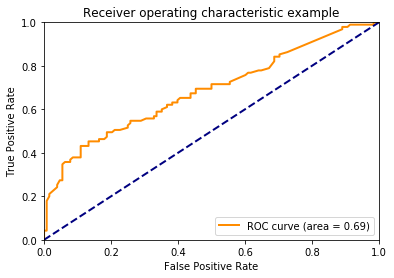

In [29]:
from sklearn import metrics
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X2_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y2_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

### 4. Including Categorical Predictors

So far, we've only used numerical features for prediction. Let's convert the character features to dummy variables so we can include them in the model:

In [30]:
titanic_with_dummies = pd.get_dummies(data=data, columns = ['Sex', 'Embarked', 'Pclass'], 
                                      prefix = ['Sex', 'Embarked', 'Pclass'] )
titanic_with_dummies.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0,0
5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1


So, this created a column for every possible value of every categorical variable. (A more compact approach would have been to reduce the number of dummy variables by one for each feature, so that the first vriable from each captures two possible states.)

Now that we have data on sex, embarkation port, and passenger class we can try to improve our `Age` imputation by stratifying it by the means of groups within the passenger population:

In [31]:
titanic_with_dummies['Age'] = titanic_with_dummies[["Age", "Parch", "Sex_male", "Pclass_1", "Pclass_2"]].groupby(["Parch", "Sex_male", "Pclass_1", "Pclass_2"])["Age"].transform(lambda x: x.fillna(x.mean()))

In [32]:
print(titanic_with_dummies.shape)
titanic_with_dummies.head()

(891, 16)


,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0,0
5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1


Now train the model using the expanded set of predictors and compute the accuracy score for the test set:

In [33]:
print(titanic_with_dummies['Age'].head(20))

PassengerId
1     22.000000
2     38.000000
3     26.000000
4     35.000000
5     35.000000
6     29.699118
7     54.000000
8      2.000000
9     27.000000
10    14.000000
11     4.000000
12    58.000000
13    20.000000
14    39.000000
15    14.000000
16    55.000000
17     2.000000
18    29.699118
19    31.000000
20    29.699118
Name: Age, dtype: float64


In [34]:
# ANSWER
# Set Feature Both Numerical, Categorical
X3 = titanic_with_dummies[['Age', 'Parch', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3']]
y3 = titanic_with_dummies['Survived']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state =1)
# Fit Model
logreg.fit(X3_train, y3_train)
pred_test3 = logreg.predict(X3_test)

# Score
print("R^2:", logreg.score(X3_train, y3_train))
print(logreg.coef_)
print(logreg.intercept_)
print(accuracy_score(y3_test, pred_test3))

R^2: 0.811377245508982
[[-0.03700259 -0.06640621  1.60215677 -0.9343267   0.42937027  0.23267657
  -0.22703623  1.21453072  0.427328   -0.97402865]]
[0.66783007]
0.7937219730941704


/Users/allenj/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Plot the ROC curve for the new model:

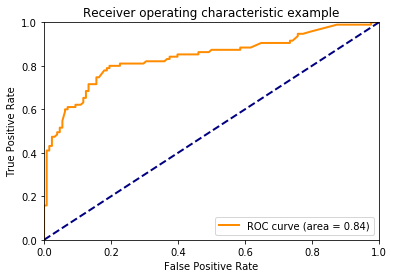

In [35]:
# ANSWER
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds3 = logreg.predict_proba(X3_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y3_test, preds3)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

Can we improve the model by including the remaining features?

In [38]:
# ANSWER
X4 = titanic_with_dummies[['Age', 'Parch', 'SibSp', 'Sex_female', 'Fare', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3']]
y4 = titanic_with_dummies['Survived']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state =1)
# Fit Model
logreg.fit(X4_train, y4_train)
pred_test4 = logreg.predict(X4_test)

# Score
print("R^2:", logreg.score(X4_train, y4_train))
print(logreg.coef_)
print(logreg.intercept_)
print(accuracy_score(y4_test, pred_test4))

R^2: 0.8098802395209581
[[-4.12893361e-02  4.00989372e-02 -3.72462408e-01  1.67927879e+00
   1.67866282e-03 -9.26346923e-01  4.20207403e-01  2.53580736e-01
  -1.49960834e-01  1.20504255e+00  4.41931207e-01 -8.94041885e-01]]
[0.75293187]
0.8026905829596412


/Users/allenj/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Homework

1. Remove the `random_state` parameter (if you have used), so that the data partition will be different every time, and run through the final modelling process a few times. Do the results change?

2. Use cross-validation to assess the quality of the model when overfitting is controlled. Does the accuracy improve?

3. Look at the `fpr` & `tpr` vectors for the best model.

In [47]:
# Model 4 without random state
X4 = titanic_with_dummies[['Age', 'Parch', 'SibSp', 'Sex_female', 'Fare', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3']]
y4 = titanic_with_dummies['Survived']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4)
# Fit Model
logreg.fit(X4_train, y4_train)
pred_test4 = logreg.predict(X4_test)

# Score
print("R^2:", logreg.score(X4_train, y4_train))
print(logreg.coef_)
print(logreg.intercept_)
print(accuracy_score(y4_test, pred_test4))

R^2: 0.8143712574850299
[[-0.0330494   0.0436489  -0.31482582  1.74565736 -0.00181421 -1.07270147
   0.22008769  0.34241529 -0.1358941   1.39246622  0.31800973 -1.03752006]]
[0.67295589]
0.7713004484304933


/Users/allenj/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
# Yes the results change

In [50]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(X4_train, y4_test)

TypeError: estimator should be an estimator implementing 'fit' method,               Age  Parch  SibSp  Sex_female      Fare  Sex_male  Embarked_C  \
PassengerId                                                                   
844          34.5      0      0           0    6.4375         1           1   
689          18.0      0      0           0    7.7958         1           0   
333          38.0      1      0           0  153.4625         1           0   
188          45.0      0      0           0   26.5500         1           0   
872          47.0      1      1           1   52.5542         0           0   
...           ...    ...    ...         ...       ...       ...         ...   
311          24.0      0      0           1   83.1583         0           1   
671          40.0      1      1           1   39.0000         0           0   
750          31.0      0      0           0    7.7500         1           0   
131          33.0      0      0           0    7.8958         1           1   
312          18.0      2      2           1  262.3750         0           1   

             Embarked_Q  Embarked_S  Pclass_1  Pclass_2  Pclass_3  
PassengerId                                                        
844                   0           0         0         0         1  
689                   0           1         0         0         1  
333                   0           1         1         0         0  
188                   0           1         1         0         0  
872                   0           1         1         0         0  
...                 ...         ...       ...       ...       ...  
311                   0           0         1         0         0  
671                   0           1         0         1         0  
750                   1           0         0         0         1  
131                   0           0         0         0         1  
312                   0           0         1         0         0  

[668 rows x 12 columns] was passed



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



